<a href="https://colab.research.google.com/github/codexmuneer/Movie-Recommendation-System/blob/main/MovieRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from rake_nltk import Rake
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [43]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [44]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


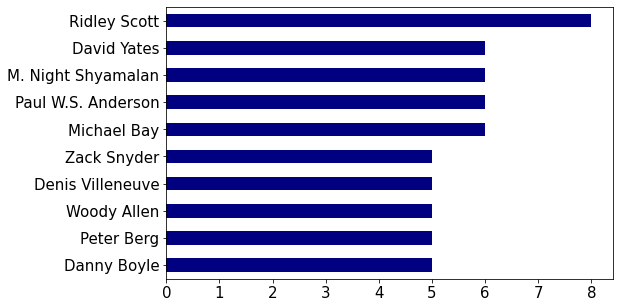

In [45]:
df['Director'].value_counts()[0:10].plot(kind = 'barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()


In [46]:
df['Key_words'] = ''

In [47]:
df['Key_words'] = df.apply(lambda row: [], axis=1)


In [48]:
row['Key_words'] = list(key_words_dict_scores.keys())


In [49]:
df.at[index, 'Key_words'] = list(key_words_dict_scores.keys())


In [50]:

df['Key_words'] = df.apply(lambda row: [], axis=1)
r = Rake()
for index, row in df.iterrows():
  r.extract_keywords_from_text(row['Description'])
  key_words_dict_scores = r.get_word_degrees()
  df.at[index, 'Key_words'] = list(key_words_dict_scores.keys())


In [51]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Key_words
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"[group, intergalactic, criminals, forced, work..."
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"[following, clues, origin, mankind, team, find..."
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"[three, girls, kidnapped, man, diagnosed, 23, ..."
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,"[city, humanoid, animals, hustling, theater, i..."
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"[secret, government, agency, recruits, dangero..."


In [52]:
df['Genre'] = df['Genre'].map(lambda x: x.split(','))
df['Actors'] = df['Actors'].map(lambda x: x.split(',')[:3])
df['Director'] = df['Director'].map(lambda x: x.split(','))
for index, row in df.iterrows():
    # Convert to lowercase and merge first and last names
    df.at[index, 'Genre'] = [x.lower().replace(' ','') for x in row['Genre']]
    actors = [f"{x.split()[0]}{x.split()[-1]}".lower() for x in row['Actors']]
    df.at[index, 'Actors'] = actors
    directors = [f"{x.split()[0]}{x.split()[-1]}".lower() for x in row['Director']]
    df.at[index, 'Director'] = directors


In [53]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Key_words
0,1,Guardians of the Galaxy,"[action, adventure, sci-fi]",A group of intergalactic criminals are forced ...,[jamesgunn],"[chrispratt, vindiesel, bradleycooper]",2014,121,8.1,757074,333.13,76.0,"[group, intergalactic, criminals, forced, work..."
1,2,Prometheus,"[adventure, mystery, sci-fi]","Following clues to the origin of mankind, a te...",[ridleyscott],"[noomirapace, loganmarshall-green, michaelfass...",2012,124,7.0,485820,126.46,65.0,"[following, clues, origin, mankind, team, find..."
2,3,Split,"[horror, thriller]",Three girls are kidnapped by a man with a diag...,[m.shyamalan],"[jamesmcavoy, anyataylor-joy, haleyrichardson]",2016,117,7.3,157606,138.12,62.0,"[three, girls, kidnapped, man, diagnosed, 23, ..."
3,4,Sing,"[animation, comedy, family]","In a city of humanoid animals, a hustling thea...",[christophelourdelet],"[matthewmcconaughey, reesewitherspoon, sethmac...",2016,108,7.2,60545,270.32,59.0,"[city, humanoid, animals, hustling, theater, i..."
4,5,Suicide Squad,"[action, adventure, fantasy]",A secret government agency recruits some of th...,[davidayer],"[willsmith, jaredleto, margotrobbie]",2016,123,6.2,393727,325.02,40.0,"[secret, government, agency, recruits, dangero..."


In [54]:
df['Bag_of_words'] = ''
columns = ['Genre', 'Director', 'Actors', 'Key_words']
for index, row in df.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    df.at[index, 'Bag_of_words'] = words
    
df = df[['Title','Bag_of_words']]


In [55]:
df.head()

,Title,Bag_of_words
0,Guardians of the Galaxy,action adventure sci-fi jamesgunn chrispratt v...
1,Prometheus,adventure mystery sci-fi ridleyscott noomirapa...
2,Split,horror thriller m.shyamalan jamesmcavoy anyata...
3,Sing,animation comedy family christophelourdelet ma...
4,Suicide Squad,action adventure fantasy davidayer willsmith j...


In [56]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['Bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.14638501 0.         ... 0.         0.05773503 0.        ]
 [0.14638501 1.         0.         ... 0.         0.05634362 0.05292561]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.05773503 0.05634362 0.         ... 0.         1.         0.06262243]
 [0.         0.05292561 0.         ... 0.         0.06262243 1.        ]]


In [59]:
indices = pd.Series(df['Title'])


In [60]:
def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_movies.append(list(df['Title'])[i])
        
    return recommended_movies


In [61]:
recommend('The Avengers')


['Avengers: Age of Ultron',
 'Spectral',
 'Captain America: Civil War',
 'Aliens vs Predator - Requiem',
 'Jupiter Ascending',
 'Fantastic Four',
 'The Hunger Games: Mockingjay - Part 2',
 'Guardians of the Galaxy',
 'After Earth',
 'Hellboy II: The Golden Army']